We will conduct a sentiment analysis on the impact of Donald Trump on Twitter having as a criterion for comparison the moment when Elon Musk became the CEO of Twitter
1)In order to be able to do this we will need the following libraries:
Re →  for cleaning the tweets
NLTK →  for removing stop words
Numpy →  for processing image
Pandas →  for handling extracted data
Textblob →  for sentiment analysis
Wordcloud →  for plotting word cloud
Tweepy →  for Twitter API authorization and extracting tweets from it
Matplotlib →  for visualization.

In [1]:
!pip install re 
!pip install nltk
!pip install tweepy
!pip install numpy 
!pip install pandas 
!pip install textblob 
!pip install matplotlib
!pip install wordcloud 
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


2)Import the previous installed libraries

In [2]:
import re
import nltk
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import seaborn as sb


3)Making use of Twitter API

In [3]:
TWITTER_API_KEY = "8r4bvIuCRsNzrbdPsCqaUoVv9"
TWITTER_API_SECRET = "JptZjnN991736aSssz4F8RUaOPtTHEOejNyDGb064KAjPJ2GMU"
TWITTER_ACCESS_TOKEN = "1297797286148399104-JTeBfDEIMD5xDmuzgtmiOcJMrurhFx"
TWITTER_ACCESS_SECRET = "FmJFEJjFiJEMMRAHenXe1dCNpPD6lz02mKuZVMzBP9b7c"

#Authentificate with Twitter
auth = tweepy.OAuthHandler(TWITTER_API_KEY, TWITTER_API_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_SECRET)
 
#Create the API object
api = tweepy.API(auth, wait_on_rate_limit=True)

4)Get tweets of and about Donald Trump before and after Elon Musk became the CEO of Twitter. The data was saved in a JSON file in case Twitter API crashes or is not available at the moment.

4.1) Before Elon Musk

In [4]:
before_query = 'realDonaldTrump -start-time:2021-01-01 -end-time:2022-10-26'  
resultsBeforeElon = tweepy.Cursor(api.search_tweets, q=before_query, lang='en', tweet_mode='extended').items(3500)
#creating json files containing the mined tweets
with open("data_before_Elon_Musk_DonaldTrump.json", "w") as f_before:
    json.dump([tweet.full_text for tweet in resultsBeforeElon], f_before)


Rate limit reached. Sleeping for: 825


In [5]:
# See how many tweets we actually mined
f_before = open("data_before_Elon_Musk_DonaldTrump.json")
data_before = json.load(f_before)
f_before.close()
len(data_before)

3500

In [6]:
# add the tweets in a dataframe
df_before = pd.DataFrame(data_before, columns=['Tweets'])  

In [7]:
# see a sample of the optained tweets before Elon Musk
df_before.shape
(100,1)
pd.set_option("display.max_colwidth", -1) 
df_before.sample(5)

C:\Users\andre\AppData\Local\Temp/ipykernel_19164/1079387593.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
1903,"@mmpadellan The strong and fearless leader, President Donald J. Trump, denounced demons all day long. They didn't like it. So much so they're scared as hell that he’s coming back. @realDonaldTrump"
1015,"@SteveLoyola808 @TomFitton @elonmusk @Twitter @realDonaldTrump LMAO\n\n""These libs should go to prison for running their private company the way they see fit 😭😭😭""\n\nSo many bitter chud tears"
418,"@elonmusk My prediction was fauci organized the Covid leak from wuhan with the help of china, and for the purpose of getting rid of @realDonaldTrump. He’s lied the entire time, and silenced anyone with a voice against the vaccines that are now going to kill millions with side effects."
66,"RT @arunpudur: Must Watch : @realDonaldTrump rips #WEF agenda apart when he called to speak at their event in Jan,2020. \n\nDays after this s…"
3327,"@DaveCensored0_3 @brandenthelord @PDavis94027422 @Vanilla96388488 @bsheffie19 @kevin_cracknell @TomFitton @elonmusk @Twitter @realDonaldTrump No, the left acknowledges history as to not repeat it. The right denies history to perpetuate divisiveness…you get mad at the left for acknowledging the past because you can’t live in a world where you have accountability. Literally blaming another group for your misfortune."


4.2) After Elon Musk

In [8]:
after_query = 'realDonaldTrump -start-time:2022-10-27' 
resultsAfterElon = tweepy.Cursor(api.search_tweets, q=after_query, lang='en', tweet_mode='extended').items(3500)
# creating json files containing the mined tweets
with open("data_after_Elon_Musk_DonaldTrump.json", "w") as f_after:
    json.dump([tweet.full_text for tweet in resultsAfterElon], f_after)

Rate limit reached. Sleeping for: 856
Rate limit reached. Sleeping for: 824


In [9]:
# See how many tweets we actually mined
f_after = open("data_after_Elon_Musk_DonaldTrump.json")
data_after = json.load(f_after)
f_after.close()
len(data_after)

3500

In [10]:
# add the tweets in a dataframe
df_after = pd.DataFrame(data_after, columns=['Tweets'])  

In [11]:
# see a sample of the optained tweets after Elon Musk
df_after.shape
(100,1)
pd.set_option("display.max_colwidth", -1) 
df_after.sample(5)

C:\Users\andre\AppData\Local\Temp/ipykernel_19164/2848080920.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
788,RT @GirlWarehouse: @GuntherEagleman @realDonaldTrump is a Stable Genius.. hope he realizes he has 90million reasons to come back on here. h…
1506,@HSajwanization @realDonaldTrump We have elon trump now 💪💪💪💪💪💪💪💪💪 https://t.co/CF5Y7SVXmG
1321,@hey_itsjustbrit @ShellenbergerMD @yoyoel @realDonaldTrump The fact that you were brainwashed to believe these words incited an insurrection is profoundly sad.\n\nRemain Peaceful - No Violence - Support Capitol Police and Law Enforcement. https://t.co/ezYVWucjte
602,@Gerrymeji @DSilvaTy1 @TheyCallMeDSP @elonmusk @POTUS @realDonaldTrump Not because of why you think! It's because when someone mentioned him I just remembered that he got reinstated! So used to POTUS being off Twitter for 2 years!
1102,"@RealNjauPaul @smutoro @elonmusk @realDonaldTrump Twitter is a public platform? By law, no. By logic, no. Perception? Multiple people using something doesn't make it public. It's still a private platform, e.g., owned by an individual, not the government. What you're suggesting is government violating rights, in reality."


5)Cleaning the tweets. We will remove from the tweets using regex + re library any URL links, mentions or any elements in a tweet that are irrelevant ot the sentiment analysis.

In [12]:
def clean_tweets(tweets):
  tweets = re.sub('@[A-Za-z0–9]+', '', tweets) # remove tag(@)
  tweets = re.sub('#[A-Za-z0–9]+', '', tweets) # remove hashtags(#)
  tweets = re.sub('RT[\s]+', '', tweets) # remove RT
  tweets = re.sub('https?:\/\/\S+', '', tweets) # remove URL links
  tweets = re.sub('\[(.*?)\]', '', tweets) #remove fonts and writing styles, e.g. [$lt...$gt]
  return tweets

Applying the previously implemented regex to our tweets lists: before and after Elon Musk

In [13]:
df_before.Tweets = df_before.Tweets.apply(clean_tweets)
df_after.Tweets = df_after.Tweets.apply(clean_tweets)

# see a sample of the resulted cleaned tweets
pd.set_option("display.max_colwidth", -1) 
df_before.sample(5)
df_after.sample(5)

C:\Users\andre\AppData\Local\Temp/ipykernel_19164/3330001544.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
958,": Must Watch : rips agenda apart when he called to speak at their event in Jan,2020. \n\nDays after this s…"
1112,82 _nate Private doesn’t give you the authority to break the law.
630,": No, 4. Just as 's 3 was disinformation, conflating imo Russian propaganda accounts fla…"
1083,Powerful
2925,I see a problem with but Fox is more accurate than the rest of the news and I'm not a fox fan


In [14]:
# export the cleaned tweets to csv files
df_before.to_csv("clean_data_before_Elon_Musk_Donald_Trump.csv")
df_after.to_csv("clean_data_after_Elon_Musk_Donald_Trump.csv")

6) Calculating the subjectivity and polarity of tweets. The subjectivity is nothing but a sentence that expresses some personal feelings, views, or beliefs. Its values range from 0 to 1 where 0 is very objective and 1 is very subjective
while polarity means emotions expressed in a sentence. Its value ranges from -1 to 1, where -1 represents the most negative comment and 1 represent the most positive comment.

In [15]:
# Subjectivity before Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity before Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_before['Subjectivity'] = df_before.Tweets.apply(subj)
df_before['Polarity'] = df_before.Tweets.apply(pol)

df_before.head(5)

,Tweets,Subjectivity,Polarity
0,5: Remember when posted this video and twitter removed it \nLet’s make it go viral \nTYSVM 🥰\nif you ReTweet this ht…,0.0,0.0
1,5: Remember when posted this video and twitter removed it \nLet’s make it go viral \nTYSVM 🥰\nif you ReTweet this ht…,0.0,0.0
2,THE FIX AGAINST WAS IN \n\n Files: Executives Twisted Rules to Blacklist \n\n,1.0,-0.5
3,"_brouhaha: Whether you're a fan of or not, the deplatforming of the President &amp; manipulation of his Tweets in the…",0.0,0.0
4,: 76 Next they will say the meteor destroying all the dinosaurs was on a …,0.0,-0.1


In [16]:
# Subjectivity after Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity after Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_after['Subjectivity'] = df_after.Tweets.apply(subj)
df_after['Polarity'] = df_after.Tweets.apply(pol)

df_after.head(5)

,Tweets,Subjectivity,Polarity
0,"Let's repeat this: Kevin McCarthy wished that would strip , as well as of their accounts.",0.0,0.0
1,_SC _ICJ _12 Trump 2024 👍🏼,0.0,0.0
2,5: Remember when posted this video and twitter removed it \nLet’s make it go viral \nTYSVM 🥰\nif you ReTweet this ht…,0.0,0.0
3,Let’s the for the 6POLITICALPRISONERs. I can get behind that!,0.7,-0.5
4,": Breaking: Files show Twitter activist employees, without basis, suppressed and censored the President of…",0.0,0.0


7) Classify the tweets into different sentiment class which are Positive, Negative and Neutral.

7.1) Before Elon Musk

In [17]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    elif polarity > 0:
        result = 'Positive'
    else:
        result = 'Neutral'
    return result
 
df_before['Sentiment'] = df_before.Polarity.apply(sentiment)
df_before.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,5: Remember when posted this video and twitter removed it \nLet’s make it go viral \nTYSVM 🥰\nif you ReTweet this ht…,0.0,0.0,Neutral
1,5: Remember when posted this video and twitter removed it \nLet’s make it go viral \nTYSVM 🥰\nif you ReTweet this ht…,0.0,0.0,Neutral
2,THE FIX AGAINST WAS IN \n\n Files: Executives Twisted Rules to Blacklist \n\n,1.0,-0.5,Negative
3,"_brouhaha: Whether you're a fan of or not, the deplatforming of the President &amp; manipulation of his Tweets in the…",0.0,0.0,Neutral
4,: 76 Next they will say the meteor destroying all the dinosaurs was on a …,0.0,-0.1,Negative


7.2) After Elon Musk

In [18]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    elif polarity > 0:
        result = 'Positive'
    else:
        result = 'Neutral'
    return result
 
df_after['Sentiment'] = df_after.Polarity.apply(sentiment)
df_after.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,"Let's repeat this: Kevin McCarthy wished that would strip , as well as of their accounts.",0.0,0.0,Neutral
1,_SC _ICJ _12 Trump 2024 👍🏼,0.0,0.0,Neutral
2,5: Remember when posted this video and twitter removed it \nLet’s make it go viral \nTYSVM 🥰\nif you ReTweet this ht…,0.0,0.0,Neutral
3,Let’s the for the 6POLITICALPRISONERs. I can get behind that!,0.7,-0.5,Negative
4,": Breaking: Files show Twitter activist employees, without basis, suppressed and censored the President of…",0.0,0.0,Neutral


7.3) The ratio of the sentiment in both situations of Donald Trump (Before and After Elon Musk) by using scatter plot, pie plot, bar plot

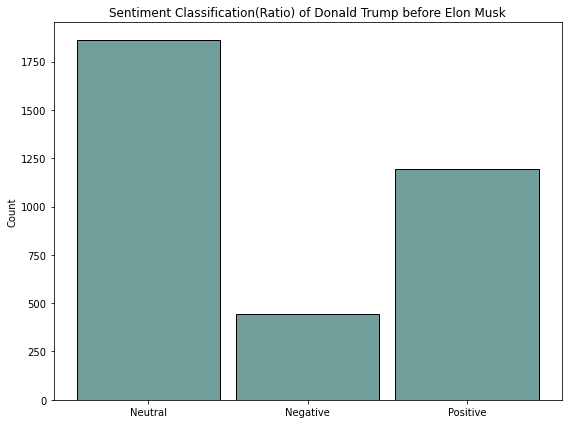

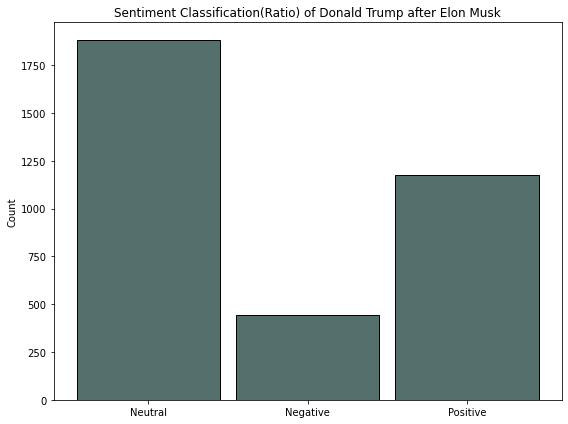

In [19]:
#The ratio of the sentiment before Elon Musk
plt.figure(figsize = (8,6))
sb.histplot(df_before, x = 'Sentiment', color = '#417D7A', shrink = 0.9).set(xlabel = None)
plt.title('Sentiment Classification(Ratio) of Donald Trump before Elon Musk')
plt.tight_layout()


#The ratio of the sentiment after Elon Musk
plt.figure(figsize = (8,6))
sb.histplot(df_after, x = 'Sentiment', color = '#1B403B', shrink = 0.9).set(xlabel = None)
plt.title('Sentiment Classification(Ratio) of Donald Trump after Elon Musk')
plt.tight_layout()

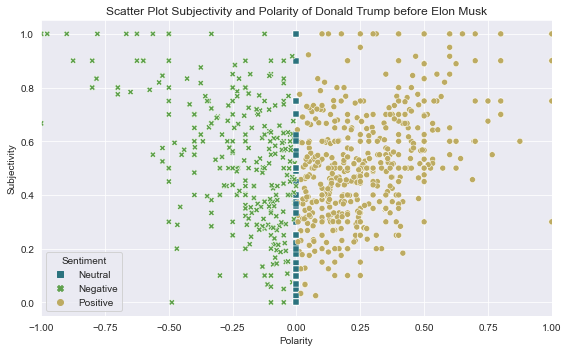

In [20]:
#Subjectivity vs Polarity in a scatter plot before Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_before, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity of Donald Trump before Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()

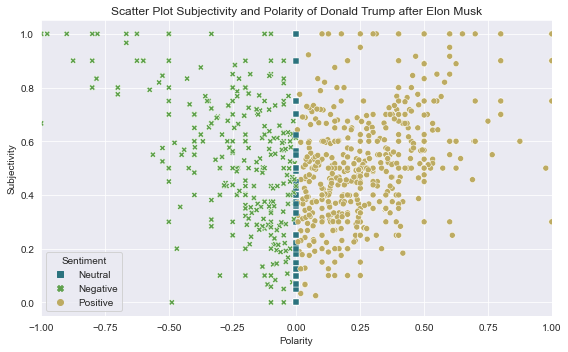

In [21]:
#Subjectivity vs Polarity in a scatter plot after Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_after, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity of Donald Trump after Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()

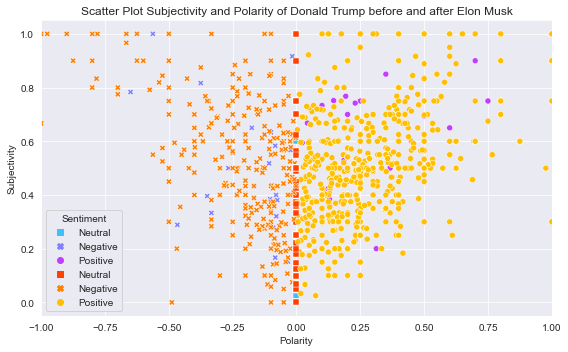

In [22]:
#Subjectivity vs Polarity in a scatter plot before and after Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_before, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'cool').set(xlim=(-1,1))
sb.scatterplot(data=df_after, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'autumn').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity of Donald Trump before and after Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()



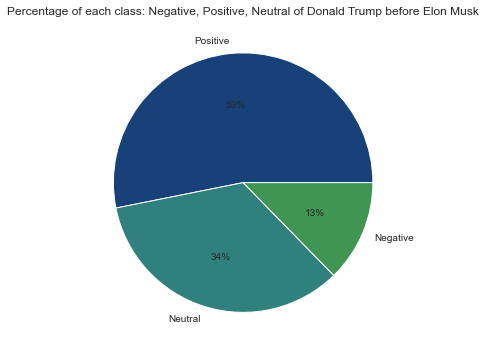

In [23]:
# The percentage of each class: Negative, Positive, Neutral before Elon Musk
 
df_sentiment_before = pd.DataFrame(df_before.Sentiment.value_counts(normalize=True)*100)
df_sentiment_before['Total Before Elon Musk'] = df_before.Sentiment.value_counts()
df_sentiment_before
plt.figure(figsize = (10, 5))
data = df_before['Sentiment'].value_counts()
colors = sb.color_palette('gist_earth')
labels = ['Positive', 'Neutral', 'Negative']
plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of each class: Negative, Positive, Neutral of Donald Trump before Elon Musk')
plt.tight_layout()


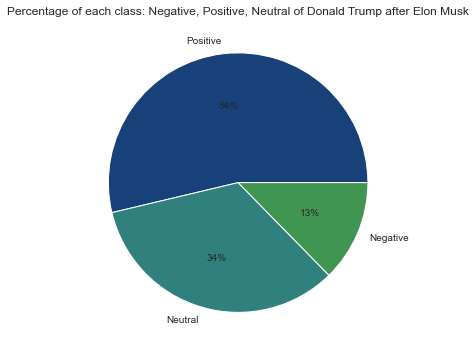

In [24]:
# The percentage of each class: Negative, Positive, Neutral after Elon Musk

df_sentiment_after = pd.DataFrame(df_after.Sentiment.value_counts(normalize=True)*100)
df_sentiment_after['Total After Elon Musk'] = df_after.Sentiment.value_counts()
df_sentiment_after
plt.figure(figsize = (10, 5))
data = df_after['Sentiment'].value_counts()
colors = sb.color_palette('gist_earth')
labels = ['Positive', 'Neutral', 'Negative']
plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of each class: Negative, Positive, Neutral of Donald Trump after Elon Musk')
plt.tight_layout()